# LawIT: Trata Brujula

## Part 2: model development

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#ANN libreries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

In [2]:
# function for plotting the metrics

def plot_metrics(df, val_metric):

    fig, axes = plt.subplots(2, 1, figsize=(6, 9), sharex=True)


    axes[0].plot(df['loss'])
    axes[0].plot(df['val_loss'])
    axes[0].set_title('Loss vs. epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Training', 'Validation'], loc='upper right')


    axes[1].plot(df[val_metric])
    axes[1].plot(df['val_'+val_metric])
    axes[1].set_title(val_metric + ' vs. epochs')
    axes[1].set_ylabel(val_metric)
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Training', 'Validation'], loc='upper right')


    plt.show()

In [3]:
# read the data
data = pd.read_csv("data.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 16 columns):
departamento                                                   75 non-null object
año                                                            75 non-null int64
canon minero                                                   75 non-null float64
casos intervenidos  por el delito de trata de personas         75 non-null float64
empleo informal miles                                          75 non-null float64
incidencia de pobreza                                          75 non-null float64
indice analfabetismo                                           75 non-null float64
indice de acceso a agua                                        75 non-null float64
pob-total-estimada                                             75 non-null float64
poblacion con al menos una necesidad basica insatisfecha       75 non-null float64
porcentaje de la población afiliada a algún seguro de salud    75 non-

In [6]:
# creating the training (2016, 2017) and test set (2018)
training_df = data[data['año'] <= 2017]
test_df = data[data['año'] == 2018]

In [7]:
#Preparing inputs

ind_variables = training_df.columns.drop(['casos intervenidos  por el delito de trata de personas', 
                                          'departamento', 
                                          'año',
                                          'canon minero'])  # canon minero is excluded

dep_variable = 'casos intervenidos  por el delito de trata de personas'

X_train = training_df.loc[:, ind_variables]
Y_train = training_df.loc[:, dep_variable]

X_test = test_df.loc[:, ind_variables]
Y_test = test_df.loc[:, dep_variable]

In [8]:
# pre-procesing data

# z-normalization of input features
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

## MODEL #1

| Parameters | Description |
| ------ | ------ |
| Layers | 3 |
| Layer 1 | 10 neurons |
| Layer 2| 10 neurons |
| Layer 3 | 1 neurons |
| Activation | Relu |
| Learning Rate | 0.001 |
| Loss | Mae |
| Metrics | Mape |

In [11]:
# MODEL DEFINITION

model_1 = Sequential([
    Dense(10, activation='relu', input_shape=(12,)),
    Dense(10, activation='relu'),
    Dense(1, activation='relu'),
])

model_1.summary()


# define the optimizer and the cost function

model_1.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mae',
    metrics = ['mape'])

model_1.evaluate(X_test, Y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
25/25 [==============================] - 0s 4ms/sample - loss: 54.0000 - mape: 100.0000


[54.0, 100.0]

In [12]:
# MODEL TRAINING

# stop the training if the validation loss doesn't improve in 100 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 100)

# save the model which achieves the optimum validation loss
checkpoint = ModelCheckpoint(filepath='model_1/model_1_weights',
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss')

history = model_1.fit(x = X_train, 
                    y = Y_train, 
                    validation_data = (X_test, Y_test),
                    epochs=2500,
                    callbacks=[early_stopping, checkpoint])

Train on 50 samples, validate on 25 samples
Epoch 1/2500
50/50 [==============================] - 0s 2ms/sample - loss: 55.6167 - mape: 99.9890 - val_loss: 54.0000 - val_mape: 100.0000
Epoch 2/2500
50/50 [==============================] - 0s 281us/sample - loss: 55.6144 - mape: 99.9786 - val_loss: 53.9994 - val_mape: 99.9987
Epoch 3/2500
50/50 [==============================] - 0s 281us/sample - loss: 55.6125 - mape: 99.9725 - val_loss: 53.9972 - val_mape: 99.9925
Epoch 4/2500
50/50 [==============================] - 0s 247us/sample - loss: 55.6099 - mape: 99.9625 - val_loss: 53.9944 - val_mape: 99.9835
Epoch 5/2500
50/50 [==============================] - 0s 244us/sample - loss: 55.6072 - mape: 99.9495 - val_loss: 53.9917 - val_mape: 99.9747
Epoch 6/2500
50/50 [==============================] - 0s 261us/sample - loss: 55.6052 - mape: 99.9416 - val_loss: 53.9889 - val_mape: 99.9654
Epoch 7/2500
50/50 [==============================] - 0s 259us/sample - loss: 55.6033 - mape: 99.9332 - v

Epoch 57/2500
50/50 [==============================] - 0s 252us/sample - loss: 54.3992 - mape: 95.2315 - val_loss: 52.3234 - val_mape: 93.9066
Epoch 58/2500
50/50 [==============================] - 0s 260us/sample - loss: 54.3441 - mape: 94.9842 - val_loss: 52.2553 - val_mape: 93.6425
Epoch 59/2500
50/50 [==============================] - 0s 271us/sample - loss: 54.2924 - mape: 94.7112 - val_loss: 52.1847 - val_mape: 93.3696
Epoch 60/2500
50/50 [==============================] - 0s 244us/sample - loss: 54.2356 - mape: 94.4717 - val_loss: 52.1127 - val_mape: 93.0909
Epoch 61/2500
50/50 [==============================] - 0s 274us/sample - loss: 54.1811 - mape: 94.2154 - val_loss: 52.0391 - val_mape: 92.8058
Epoch 62/2500
50/50 [==============================] - 0s 253us/sample - loss: 54.1243 - mape: 93.9057 - val_loss: 51.9648 - val_mape: 92.5183
Epoch 63/2500
50/50 [==============================] - 0s 257us/sample - loss: 54.0685 - mape: 93.6715 - val_loss: 51.8900 - val_mape: 92.2276

50/50 [==============================] - 0s 308us/sample - loss: 42.5500 - mape: 84.6164 - val_loss: 39.2384 - val_mape: 71.7791
Epoch 172/2500
50/50 [==============================] - 0s 257us/sample - loss: 42.4627 - mape: 84.8929 - val_loss: 39.1421 - val_mape: 71.9115
Epoch 173/2500
50/50 [==============================] - 0s 263us/sample - loss: 42.3701 - mape: 85.3064 - val_loss: 39.0468 - val_mape: 72.0461
Epoch 174/2500
50/50 [==============================] - 0s 263us/sample - loss: 42.2873 - mape: 85.6719 - val_loss: 38.9496 - val_mape: 72.1831
Epoch 175/2500
50/50 [==============================] - 0s 254us/sample - loss: 42.2006 - mape: 86.1118 - val_loss: 38.8508 - val_mape: 72.3229
Epoch 176/2500
50/50 [==============================] - 0s 247us/sample - loss: 42.1274 - mape: 86.5651 - val_loss: 38.7493 - val_mape: 72.4636
Epoch 177/2500
50/50 [==============================] - 0s 259us/sample - loss: 42.0322 - mape: 87.1483 - val_loss: 38.6491 - val_mape: 72.6009
Epoch 1

Epoch 228/2500
50/50 [==============================] - 0s 256us/sample - loss: 36.8127 - mape: 113.2497 - val_loss: 33.0451 - val_mape: 85.4084
Epoch 229/2500
50/50 [==============================] - 0s 239us/sample - loss: 36.7281 - mape: 113.8411 - val_loss: 32.9463 - val_mape: 85.8892
Epoch 230/2500
50/50 [==============================] - 0s 276us/sample - loss: 36.6381 - mape: 114.6525 - val_loss: 32.8501 - val_mape: 86.3568
Epoch 231/2500
50/50 [==============================] - 0s 245us/sample - loss: 36.5438 - mape: 115.0879 - val_loss: 32.7634 - val_mape: 86.7964
Epoch 232/2500
50/50 [==============================] - 0s 280us/sample - loss: 36.4863 - mape: 115.7839 - val_loss: 32.6762 - val_mape: 87.2528
Epoch 233/2500
50/50 [==============================] - 0s 265us/sample - loss: 36.4154 - mape: 116.5605 - val_loss: 32.5921 - val_mape: 87.6869
Epoch 234/2500
50/50 [==============================] - 0s 258us/sample - loss: 36.3461 - mape: 117.1447 - val_loss: 32.5128 - val

50/50 [==============================] - 0s 264us/sample - loss: 30.4082 - mape: 147.4671 - val_loss: 26.8786 - val_mape: 102.0155
Epoch 341/2500
50/50 [==============================] - 0s 250us/sample - loss: 30.3515 - mape: 147.6704 - val_loss: 26.8219 - val_mape: 101.9479
Epoch 342/2500
50/50 [==============================] - 0s 265us/sample - loss: 30.2946 - mape: 147.6852 - val_loss: 26.7612 - val_mape: 101.8383
Epoch 343/2500
50/50 [==============================] - 0s 250us/sample - loss: 30.2261 - mape: 147.7797 - val_loss: 26.7018 - val_mape: 101.7328
Epoch 344/2500
50/50 [==============================] - 0s 250us/sample - loss: 30.1702 - mape: 147.8725 - val_loss: 26.6445 - val_mape: 101.6590
Epoch 345/2500
50/50 [==============================] - 0s 255us/sample - loss: 30.1038 - mape: 148.0279 - val_loss: 26.5856 - val_mape: 101.5740
Epoch 346/2500
50/50 [==============================] - 0s 243us/sample - loss: 30.0331 - mape: 148.1474 - val_loss: 26.5258 - val_mape: 10

50/50 [==============================] - 0s 255us/sample - loss: 21.5190 - mape: 140.7276 - val_loss: 18.8253 - val_mape: 88.0811
Epoch 453/2500
50/50 [==============================] - 0s 260us/sample - loss: 21.4009 - mape: 140.7955 - val_loss: 18.7506 - val_mape: 88.0698
Epoch 454/2500
50/50 [==============================] - 0s 284us/sample - loss: 21.3174 - mape: 140.8340 - val_loss: 18.6738 - val_mape: 88.0201
Epoch 455/2500
50/50 [==============================] - 0s 250us/sample - loss: 21.1888 - mape: 140.8286 - val_loss: 18.5774 - val_mape: 87.7960
Epoch 456/2500
50/50 [==============================] - 0s 249us/sample - loss: 21.0622 - mape: 140.6784 - val_loss: 18.4841 - val_mape: 87.5994
Epoch 457/2500
50/50 [==============================] - 0s 246us/sample - loss: 20.9418 - mape: 140.5560 - val_loss: 18.3941 - val_mape: 87.4260
Epoch 458/2500
50/50 [==============================] - 0s 270us/sample - loss: 20.8503 - mape: 140.6006 - val_loss: 18.3013 - val_mape: 87.2578


50/50 [==============================] - 0s 275us/sample - loss: 15.6542 - mape: 115.7679 - val_loss: 13.7092 - val_mape: 60.4584
Epoch 565/2500
50/50 [==============================] - 0s 290us/sample - loss: 15.6417 - mape: 115.8059 - val_loss: 13.7084 - val_mape: 60.4473
Epoch 566/2500
50/50 [==============================] - 0s 267us/sample - loss: 15.6245 - mape: 115.7272 - val_loss: 13.7022 - val_mape: 60.3662
Epoch 567/2500
50/50 [==============================] - 0s 120us/sample - loss: 15.6146 - mape: 115.5870 - val_loss: 13.7092 - val_mape: 60.3171
Epoch 568/2500
50/50 [==============================] - 0s 124us/sample - loss: 15.5920 - mape: 115.4007 - val_loss: 13.7188 - val_mape: 60.2615
Epoch 569/2500
50/50 [==============================] - 0s 104us/sample - loss: 15.5823 - mape: 115.2305 - val_loss: 13.7241 - val_mape: 60.2030
Epoch 570/2500
50/50 [==============================] - 0s 102us/sample - loss: 15.5639 - mape: 114.9765 - val_loss: 13.7175 - val_mape: 60.0766


50/50 [==============================] - 0s 119us/sample - loss: 14.0616 - mape: 102.8670 - val_loss: 13.2367 - val_mape: 54.6297
Epoch 677/2500
50/50 [==============================] - 0s 103us/sample - loss: 14.0451 - mape: 102.7422 - val_loss: 13.2349 - val_mape: 54.5275
Epoch 678/2500
50/50 [==============================] - 0s 277us/sample - loss: 14.0305 - mape: 102.5250 - val_loss: 13.2302 - val_mape: 54.3913
Epoch 679/2500
50/50 [==============================] - 0s 260us/sample - loss: 14.0130 - mape: 102.2954 - val_loss: 13.2296 - val_mape: 54.3111
Epoch 680/2500
50/50 [==============================] - 0s 95us/sample - loss: 14.0051 - mape: 102.2376 - val_loss: 13.2367 - val_mape: 54.3096
Epoch 681/2500
50/50 [==============================] - 0s 109us/sample - loss: 13.9931 - mape: 102.1786 - val_loss: 13.2394 - val_mape: 54.2809
Epoch 682/2500
50/50 [==============================] - 0s 102us/sample - loss: 13.9730 - mape: 102.1277 - val_loss: 13.2315 - val_mape: 54.1992
E

Epoch 733/2500
50/50 [==============================] - 0s 107us/sample - loss: 13.3129 - mape: 97.6578 - val_loss: 13.1310 - val_mape: 52.7222
Epoch 734/2500
50/50 [==============================] - 0s 113us/sample - loss: 13.3088 - mape: 97.6439 - val_loss: 13.1323 - val_mape: 52.7107
Epoch 735/2500
50/50 [==============================] - 0s 140us/sample - loss: 13.2988 - mape: 97.4944 - val_loss: 13.1295 - val_mape: 52.6444
Epoch 736/2500
50/50 [==============================] - 0s 104us/sample - loss: 13.2824 - mape: 97.4045 - val_loss: 13.1310 - val_mape: 52.6036
Epoch 737/2500
50/50 [==============================] - 0s 115us/sample - loss: 13.2683 - mape: 97.3155 - val_loss: 13.1402 - val_mape: 52.5854
Epoch 738/2500
50/50 [==============================] - 0s 103us/sample - loss: 13.2612 - mape: 97.1855 - val_loss: 13.1510 - val_mape: 52.6054
Epoch 739/2500
50/50 [==============================] - 0s 115us/sample - loss: 13.2448 - mape: 97.0933 - val_loss: 13.1574 - val_mape: 

Epoch 790/2500
50/50 [==============================] - 0s 125us/sample - loss: 12.7473 - mape: 91.7694 - val_loss: 13.3435 - val_mape: 51.0805
Epoch 791/2500
50/50 [==============================] - 0s 114us/sample - loss: 12.7334 - mape: 91.5673 - val_loss: 13.3508 - val_mape: 51.0369
Epoch 792/2500
50/50 [==============================] - 0s 119us/sample - loss: 12.7211 - mape: 91.4332 - val_loss: 13.3512 - val_mape: 51.0585
Epoch 793/2500
50/50 [==============================] - 0s 100us/sample - loss: 12.7145 - mape: 91.4794 - val_loss: 13.3470 - val_mape: 51.1008
Epoch 794/2500
50/50 [==============================] - 0s 112us/sample - loss: 12.7048 - mape: 91.4809 - val_loss: 13.3422 - val_mape: 51.1390
Epoch 795/2500
50/50 [==============================] - 0s 107us/sample - loss: 12.6976 - mape: 91.4994 - val_loss: 13.3398 - val_mape: 51.1532
Epoch 796/2500
50/50 [==============================] - 0s 109us/sample - loss: 12.6949 - mape: 91.4733 - val_loss: 13.3477 - val_mape: 

final metrics: [13.5091552734375, 51.00391]


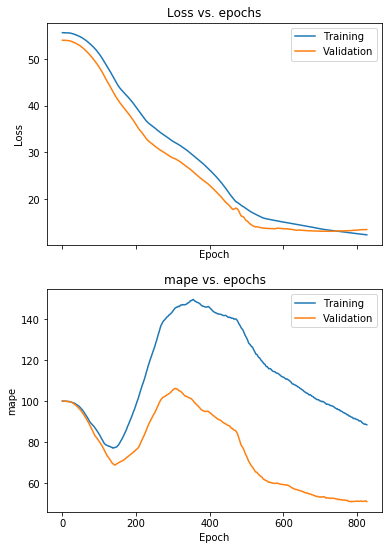

In [13]:
# plot the metrics
print("final metrics:", model_1.evaluate(X_test, Y_test, verbose=False))
plot_metrics(history.history, 'mape')

In [15]:
# dataframe to observe the results

results = pd.DataFrame({'departamento': test_df.loc[:, "departamento"],
                        'observed': Y_test,
                        'predicted': model_1.predict(X_test).reshape(25)})

results["abs_error"] = (results["observed"] - results["predicted"]).abs()

results.sort_values("abs_error", ascending=False)

,departamento,observed,predicted,abs_error
50,madre de dios,96.0,24.849010,71.150990
44,lima,323.0,352.978210,29.978210
32,ica,22.0,51.088249,29.088249
20,callao,69.0,47.376690,21.623310
14,ayacucho,28.0,8.951044,19.048956
62,puno,113.0,94.494415,18.505585
35,junin,64.0,47.587635,16.412365
11,arequipa,83.0,67.384315,15.615685
23,cusco,50.0,65.453339,15.453339
53,moquegua,5.0,18.504419,13.504419


In [ ]:
denuncias de trata 2018 = funcion(11 indicadores 2018)

In [ ]:
y = ax+b

denuncias = a(violencia) + b(analfabtismo) + .....

## MODEL #2

| Parameters | Description |
| ------ | ------ |
| Layers | 4 |
| Layer 1 | 15 neurons |
| Layer 2| 15 neurons |
| Layer 3 | 5 neurons |
| Layer 4 | 1 neurons |
| Activation | Relu |
| Learning Rate | 0.001 |
| Loss | Mae |
| Metrics | Mape |

In [17]:
# MODEL DEFINITION

model_2 = Sequential([
    Dense(15, activation='relu', input_shape=(12,)),
    Dense(15, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='relu'),
])

model_2.summary()

# define the optimizer and the cost function
model_2.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mae',
    metrics = ['mape'])

model_2.evaluate(X_test, Y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                195       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
25/25 [==============================] - 0s 802us/sample - loss: 53.9403 - mape: 99.6147


[53.9403076171875, 99.6147]

In [18]:
# MODEL TRAINING

# stop the training if the validation loss doesn't improve in 100 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 100)

# save the model which achieves the optimum validation loss
checkpoint = ModelCheckpoint(filepath='model_2/model_2_weights',
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss')

history = model_2.fit(x = X_train, 
                    y = Y_train, 
                    validation_data = (X_test, Y_test),
                    epochs=2500,
                    callbacks=[early_stopping, checkpoint])

Train on 50 samples, validate on 25 samples
Epoch 1/2500
50/50 [==============================] - 0s 2ms/sample - loss: 55.5645 - mape: 99.6895 - val_loss: 53.9259 - val_mape: 99.5282
Epoch 2/2500
50/50 [==============================] - 0s 276us/sample - loss: 55.5513 - mape: 99.6234 - val_loss: 53.9117 - val_mape: 99.4397
Epoch 3/2500
50/50 [==============================] - 0s 283us/sample - loss: 55.5366 - mape: 99.4777 - val_loss: 53.8959 - val_mape: 99.3478
Epoch 4/2500
50/50 [==============================] - 0s 283us/sample - loss: 55.5184 - mape: 99.2757 - val_loss: 53.8768 - val_mape: 99.2465
Epoch 5/2500
50/50 [==============================] - 0s 272us/sample - loss: 55.4966 - mape: 99.1274 - val_loss: 53.8545 - val_mape: 99.1251
Epoch 6/2500
50/50 [==============================] - 0s 301us/sample - loss: 55.4696 - mape: 98.9070 - val_loss: 53.8323 - val_mape: 99.0044
Epoch 7/2500
50/50 [==============================] - 0s 317us/sample - loss: 55.4451 - mape: 98.6605 - va

Epoch 57/2500
50/50 [==============================] - 0s 293us/sample - loss: 50.4091 - mape: 86.3457 - val_loss: 48.6389 - val_mape: 80.8030
Epoch 58/2500
50/50 [==============================] - 0s 278us/sample - loss: 50.1745 - mape: 86.0047 - val_loss: 48.4123 - val_mape: 80.6632
Epoch 59/2500
50/50 [==============================] - 0s 298us/sample - loss: 49.9232 - mape: 85.9360 - val_loss: 48.1783 - val_mape: 80.5249
Epoch 60/2500
50/50 [==============================] - 0s 280us/sample - loss: 49.6718 - mape: 85.7547 - val_loss: 47.9325 - val_mape: 80.3791
Epoch 61/2500
50/50 [==============================] - 0s 310us/sample - loss: 49.4108 - mape: 85.4787 - val_loss: 47.6752 - val_mape: 80.2266
Epoch 62/2500
50/50 [==============================] - 0s 267us/sample - loss: 49.1494 - mape: 85.3729 - val_loss: 47.4076 - val_mape: 80.0520
Epoch 63/2500
50/50 [==============================] - 0s 281us/sample - loss: 48.8915 - mape: 85.4388 - val_loss: 47.1318 - val_mape: 79.8631

50/50 [==============================] - 0s 316us/sample - loss: 33.8943 - mape: 131.3416 - val_loss: 30.1885 - val_mape: 98.3931
Epoch 115/2500
50/50 [==============================] - 0s 299us/sample - loss: 33.6868 - mape: 132.6630 - val_loss: 30.0212 - val_mape: 99.2968
Epoch 116/2500
50/50 [==============================] - 0s 275us/sample - loss: 33.4857 - mape: 134.3498 - val_loss: 29.8460 - val_mape: 100.2030
Epoch 117/2500
50/50 [==============================] - 0s 305us/sample - loss: 33.3506 - mape: 135.7180 - val_loss: 29.6657 - val_mape: 101.1852
Epoch 118/2500
50/50 [==============================] - 0s 280us/sample - loss: 33.0705 - mape: 137.2077 - val_loss: 29.4956 - val_mape: 102.0713
Epoch 119/2500
50/50 [==============================] - 0s 274us/sample - loss: 32.9155 - mape: 139.3590 - val_loss: 29.3176 - val_mape: 103.0956
Epoch 120/2500
50/50 [==============================] - 0s 306us/sample - loss: 32.6752 - mape: 140.6408 - val_loss: 29.1385 - val_mape: 104.

50/50 [==============================] - 0s 104us/sample - loss: 16.7010 - mape: 145.3422 - val_loss: 15.5876 - val_mape: 67.2952
Epoch 227/2500
50/50 [==============================] - 0s 100us/sample - loss: 16.6263 - mape: 144.3755 - val_loss: 15.6060 - val_mape: 66.7807
Epoch 228/2500
50/50 [==============================] - 0s 125us/sample - loss: 16.5415 - mape: 143.3985 - val_loss: 15.6197 - val_mape: 66.2622
Epoch 229/2500
50/50 [==============================] - 0s 112us/sample - loss: 16.4785 - mape: 142.6816 - val_loss: 15.6295 - val_mape: 65.7035
Epoch 230/2500
50/50 [==============================] - 0s 117us/sample - loss: 16.3913 - mape: 141.8551 - val_loss: 15.6332 - val_mape: 65.2717
Epoch 231/2500
50/50 [==============================] - 0s 105us/sample - loss: 16.3087 - mape: 141.3021 - val_loss: 15.6294 - val_mape: 64.8675
Epoch 232/2500
50/50 [==============================] - 0s 130us/sample - loss: 16.2788 - mape: 140.9905 - val_loss: 15.6181 - val_mape: 64.3606


50/50 [==============================] - 0s 309us/sample - loss: 13.7222 - mape: 102.3395 - val_loss: 15.3399 - val_mape: 48.8744
Epoch 339/2500
50/50 [==============================] - 0s 416us/sample - loss: 13.6980 - mape: 102.4009 - val_loss: 15.3331 - val_mape: 48.8445
Epoch 340/2500
50/50 [==============================] - 0s 320us/sample - loss: 13.6903 - mape: 102.3781 - val_loss: 15.3266 - val_mape: 48.7141
Epoch 341/2500
50/50 [==============================] - 0s 308us/sample - loss: 13.6901 - mape: 102.0484 - val_loss: 15.3165 - val_mape: 48.6348
Epoch 342/2500
50/50 [==============================] - 0s 283us/sample - loss: 13.6684 - mape: 101.7655 - val_loss: 15.3010 - val_mape: 48.6407
Epoch 343/2500
50/50 [==============================] - 0s 293us/sample - loss: 13.6595 - mape: 101.6980 - val_loss: 15.2839 - val_mape: 48.6984
Epoch 344/2500
50/50 [==============================] - 0s 292us/sample - loss: 13.6420 - mape: 101.6974 - val_loss: 15.2721 - val_mape: 48.7087


Epoch 395/2500
50/50 [==============================] - 0s 304us/sample - loss: 13.0022 - mape: 92.3543 - val_loss: 14.7611 - val_mape: 46.8133
Epoch 396/2500
50/50 [==============================] - 0s 276us/sample - loss: 12.9896 - mape: 92.0511 - val_loss: 14.7288 - val_mape: 46.7938
Epoch 397/2500
50/50 [==============================] - 0s 295us/sample - loss: 12.9791 - mape: 92.0866 - val_loss: 14.7043 - val_mape: 46.7448
Epoch 398/2500
50/50 [==============================] - 0s 276us/sample - loss: 12.9723 - mape: 91.9392 - val_loss: 14.6950 - val_mape: 46.6520
Epoch 399/2500
50/50 [==============================] - 0s 110us/sample - loss: 12.9648 - mape: 91.6131 - val_loss: 14.6955 - val_mape: 46.5913
Epoch 400/2500
50/50 [==============================] - 0s 120us/sample - loss: 12.9416 - mape: 91.4180 - val_loss: 14.6985 - val_mape: 46.5233
Epoch 401/2500
50/50 [==============================] - 0s 113us/sample - loss: 12.9228 - mape: 91.2495 - val_loss: 14.7071 - val_mape: 

Epoch 452/2500
50/50 [==============================] - 0s 273us/sample - loss: 12.3404 - mape: 83.3668 - val_loss: 14.3144 - val_mape: 44.7803
Epoch 453/2500
50/50 [==============================] - 0s 282us/sample - loss: 12.3379 - mape: 83.0752 - val_loss: 14.3005 - val_mape: 44.6961
Epoch 454/2500
50/50 [==============================] - 0s 305us/sample - loss: 12.3051 - mape: 82.8823 - val_loss: 14.2834 - val_mape: 44.6381
Epoch 455/2500
50/50 [==============================] - 0s 99us/sample - loss: 12.2977 - mape: 82.7758 - val_loss: 14.2848 - val_mape: 44.5532
Epoch 456/2500
50/50 [==============================] - 0s 288us/sample - loss: 12.3105 - mape: 82.5480 - val_loss: 14.2832 - val_mape: 44.5223
Epoch 457/2500
50/50 [==============================] - 0s 270us/sample - loss: 12.2941 - mape: 82.2862 - val_loss: 14.2759 - val_mape: 44.5933
Epoch 458/2500
50/50 [==============================] - 0s 284us/sample - loss: 12.2805 - mape: 82.3255 - val_loss: 14.2689 - val_mape: 4

Epoch 509/2500
50/50 [==============================] - 0s 307us/sample - loss: 11.6663 - mape: 73.9840 - val_loss: 13.9156 - val_mape: 42.6193
Epoch 510/2500
50/50 [==============================] - 0s 102us/sample - loss: 11.6647 - mape: 73.8061 - val_loss: 13.9273 - val_mape: 42.6057
Epoch 511/2500
50/50 [==============================] - 0s 100us/sample - loss: 11.6459 - mape: 73.5569 - val_loss: 13.9290 - val_mape: 42.6184
Epoch 512/2500
50/50 [==============================] - 0s 107us/sample - loss: 11.6328 - mape: 73.3569 - val_loss: 13.9156 - val_mape: 42.6371
Epoch 513/2500
50/50 [==============================] - 0s 302us/sample - loss: 11.6241 - mape: 73.1660 - val_loss: 13.9017 - val_mape: 42.6865
Epoch 514/2500
50/50 [==============================] - 0s 318us/sample - loss: 11.6129 - mape: 73.1047 - val_loss: 13.8970 - val_mape: 42.7900
Epoch 515/2500
50/50 [==============================] - 0s 271us/sample - loss: 11.6001 - mape: 73.1361 - val_loss: 13.8961 - val_mape: 

Epoch 566/2500
50/50 [==============================] - 0s 115us/sample - loss: 11.0846 - mape: 68.9181 - val_loss: 13.6736 - val_mape: 42.3329
Epoch 567/2500
50/50 [==============================] - 0s 120us/sample - loss: 11.0694 - mape: 68.4624 - val_loss: 13.6661 - val_mape: 42.0670
Epoch 568/2500
50/50 [==============================] - 0s 275us/sample - loss: 11.0892 - mape: 67.9232 - val_loss: 13.6591 - val_mape: 42.1314
Epoch 569/2500
50/50 [==============================] - 0s 287us/sample - loss: 11.0695 - mape: 68.1320 - val_loss: 13.6546 - val_mape: 42.3276
Epoch 570/2500
50/50 [==============================] - 0s 287us/sample - loss: 11.0305 - mape: 68.2039 - val_loss: 13.6319 - val_mape: 42.3410
Epoch 571/2500
50/50 [==============================] - 0s 269us/sample - loss: 11.0278 - mape: 68.0990 - val_loss: 13.5896 - val_mape: 42.3696
Epoch 572/2500
50/50 [==============================] - 0s 269us/sample - loss: 11.0292 - mape: 68.3140 - val_loss: 13.5606 - val_mape: 

Epoch 623/2500
50/50 [==============================] - 0s 118us/sample - loss: 10.3432 - mape: 61.6299 - val_loss: 13.5748 - val_mape: 42.1175
Epoch 624/2500
50/50 [==============================] - 0s 101us/sample - loss: 10.3408 - mape: 61.6866 - val_loss: 13.5746 - val_mape: 42.0799
Epoch 625/2500
50/50 [==============================] - 0s 113us/sample - loss: 10.3375 - mape: 61.4332 - val_loss: 13.6103 - val_mape: 41.9378
Epoch 626/2500
50/50 [==============================] - 0s 109us/sample - loss: 10.3261 - mape: 61.1361 - val_loss: 13.6367 - val_mape: 42.1128
Epoch 627/2500
50/50 [==============================] - 0s 119us/sample - loss: 10.3135 - mape: 61.2867 - val_loss: 13.6668 - val_mape: 42.3375
Epoch 628/2500
50/50 [==============================] - 0s 102us/sample - loss: 10.3014 - mape: 61.6139 - val_loss: 13.6699 - val_mape: 42.3768
Epoch 629/2500
50/50 [==============================] - 0s 103us/sample - loss: 10.3145 - mape: 61.4612 - val_loss: 13.6570 - val_mape: 

50/50 [==============================] - 0s 113us/sample - loss: 9.7123 - mape: 55.2109 - val_loss: 13.5280 - val_mape: 40.7876
Epoch 681/2500
50/50 [==============================] - 0s 124us/sample - loss: 9.7177 - mape: 54.8941 - val_loss: 13.5329 - val_mape: 40.8583
Epoch 682/2500
50/50 [==============================] - 0s 111us/sample - loss: 9.7050 - mape: 55.1420 - val_loss: 13.5107 - val_mape: 40.7706
Epoch 683/2500
50/50 [==============================] - 0s 316us/sample - loss: 9.6997 - mape: 54.9596 - val_loss: 13.4558 - val_mape: 40.5706
Epoch 684/2500
50/50 [==============================] - 0s 312us/sample - loss: 9.6852 - mape: 54.6582 - val_loss: 13.4347 - val_mape: 40.5517
Epoch 685/2500
50/50 [==============================] - 0s 99us/sample - loss: 9.6680 - mape: 54.5480 - val_loss: 13.4382 - val_mape: 40.5986
Epoch 686/2500
50/50 [==============================] - 0s 111us/sample - loss: 9.6689 - mape: 54.5867 - val_loss: 13.4680 - val_mape: 40.7165
Epoch 687/2500


50/50 [==============================] - 0s 116us/sample - loss: 8.5238 - mape: 41.2988 - val_loss: 13.1923 - val_mape: 40.5597
Epoch 795/2500
50/50 [==============================] - 0s 108us/sample - loss: 8.5115 - mape: 40.6956 - val_loss: 13.2345 - val_mape: 40.6471
Epoch 796/2500
50/50 [==============================] - 0s 130us/sample - loss: 8.4947 - mape: 40.6144 - val_loss: 13.2725 - val_mape: 40.8938
Epoch 797/2500
50/50 [==============================] - 0s 116us/sample - loss: 8.4703 - mape: 40.7524 - val_loss: 13.2722 - val_mape: 40.8912
Epoch 798/2500
50/50 [==============================] - 0s 113us/sample - loss: 8.4522 - mape: 40.6381 - val_loss: 13.2387 - val_mape: 40.6528
Epoch 799/2500
50/50 [==============================] - 0s 125us/sample - loss: 8.4501 - mape: 40.3084 - val_loss: 13.2084 - val_mape: 40.5308
Epoch 800/2500
50/50 [==============================] - 0s 112us/sample - loss: 8.4320 - mape: 40.5179 - val_loss: 13.2317 - val_mape: 40.7030
Epoch 801/2500

50/50 [==============================] - 0s 102us/sample - loss: 7.0871 - mape: 29.4618 - val_loss: 12.8738 - val_mape: 39.9211
Epoch 909/2500
50/50 [==============================] - 0s 110us/sample - loss: 7.0607 - mape: 29.3939 - val_loss: 12.8840 - val_mape: 39.9077
Epoch 910/2500
50/50 [==============================] - 0s 118us/sample - loss: 7.0541 - mape: 29.2455 - val_loss: 12.9280 - val_mape: 39.8972
Epoch 911/2500
50/50 [==============================] - 0s 116us/sample - loss: 7.0599 - mape: 28.9282 - val_loss: 12.9093 - val_mape: 39.8917
Epoch 912/2500
50/50 [==============================] - 0s 115us/sample - loss: 7.0375 - mape: 28.9331 - val_loss: 12.8564 - val_mape: 39.9044
Epoch 913/2500
50/50 [==============================] - 0s 124us/sample - loss: 7.0451 - mape: 29.5255 - val_loss: 12.8518 - val_mape: 39.8821
Epoch 914/2500
50/50 [==============================] - 0s 109us/sample - loss: 7.0042 - mape: 28.8761 - val_loss: 12.9456 - val_mape: 40.0465
Epoch 915/2500

final metrics: [13.047557830810547, 41.621338]


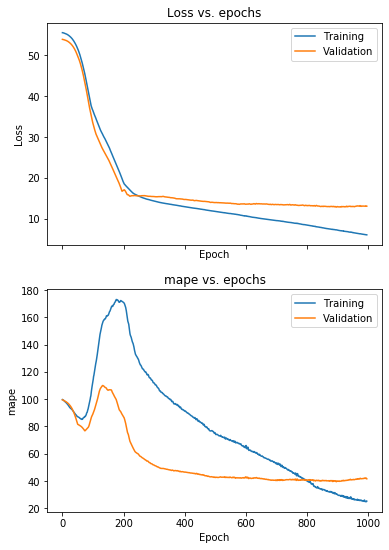

In [19]:
# plot the metrics
print("final metrics:", model_2.evaluate(X_test, Y_test, verbose=False))
plot_metrics(history.history, 'mape')

In [20]:
# dataframe to observe the results

results = pd.DataFrame({'departamento': test_df.loc[:, "departamento"],
                        'observed': Y_test,
                        'predicted': model_2.predict(X_test).reshape(25)})

results["abs_error"] = (results["observed"] - results["predicted"]).abs()

results.sort_values("abs_error", ascending=False)

,departamento,observed,predicted,abs_error
50,madre de dios,96.0,33.412090,62.587910
44,lima,323.0,354.881470,31.881470
35,junin,64.0,38.590431,25.409569
11,arequipa,83.0,59.669418,23.330582
71,tumbes,33.0,55.308918,22.308918
23,cusco,50.0,71.173157,21.173157
14,ayacucho,28.0,9.733480,18.266520
20,callao,69.0,52.251900,16.748100
59,piura,64.0,49.424690,14.575310
17,cajamarca,19.0,32.236748,13.236748


## MODEL #3

| Parameters | Description |
| ------ | ------ |
| Layers | 4 |
| Layer 1 | 15 neurons |
| Layer 2 | 15 neurons |
| Layer 3 | 5 neurons |
| Layer 4 | 1 neuron |
| Activation | Relu |
| Learning Rate | 0.001 |
| Loss | mape |
| Metrics | mae |

In [46]:
# Model 3

# MODEL DEFINITION

model_3 = Sequential([
    Dense(15, activation='relu', input_shape=(12,)),
    Dense(15, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='relu'),
])

model_3.summary()

# define the optimizer and the cost function
model_3.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mape',
    metrics = ['mae'])

model_3.evaluate(X_test, Y_test)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 15)                195       
_________________________________________________________________
dense_40 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_41 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 6         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
25/25 [==============================] - 0s 930us/sample - loss: 99.2921 - mae: 53.8672


[99.29214477539062, 53.86724]

In [47]:
# MODEL TRAINING

# stop the training if the validation loss doesn't improve in 100 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 100)

# save the model which achieves the optimum validation loss
checkpoint = ModelCheckpoint(filepath='model_3/model_3_weights',
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss')

history = model_3.fit(x = X_train, 
                    y = Y_train, 
                    validation_data = (X_test, Y_test),
                    epochs=2500,
                    callbacks=[early_stopping, checkpoint])

Train on 50 samples, validate on 25 samples
Epoch 1/2500
50/50 [==============================] - 0s 2ms/sample - loss: 98.8751 - mae: 55.4792 - val_loss: 99.1843 - val_mae: 53.8471
Epoch 2/2500
50/50 [==============================] - 0s 293us/sample - loss: 98.7013 - mae: 55.4585 - val_loss: 99.0621 - val_mae: 53.8280
Epoch 3/2500
50/50 [==============================] - 0s 266us/sample - loss: 98.5124 - mae: 55.4390 - val_loss: 98.9441 - val_mae: 53.8084
Epoch 4/2500
50/50 [==============================] - 0s 286us/sample - loss: 98.3205 - mae: 55.4184 - val_loss: 98.8243 - val_mae: 53.7882
Epoch 5/2500
50/50 [==============================] - 0s 310us/sample - loss: 98.1700 - mae: 55.3954 - val_loss: 98.7000 - val_mae: 53.7664
Epoch 6/2500
50/50 [==============================] - 0s 271us/sample - loss: 97.9887 - mae: 55.3718 - val_loss: 98.5716 - val_mae: 53.7435
Epoch 7/2500
50/50 [==============================] - 0s 282us/sample - loss: 97.7910 - mae: 55.3474 - val_loss: 98.44

50/50 [==============================] - 0s 277us/sample - loss: 71.0476 - mae: 47.8116 - val_loss: 71.4926 - val_mae: 44.6732
Epoch 116/2500
50/50 [==============================] - 0s 296us/sample - loss: 70.9329 - mae: 47.7413 - val_loss: 71.4206 - val_mae: 44.6118
Epoch 117/2500
50/50 [==============================] - 0s 267us/sample - loss: 70.8251 - mae: 47.6749 - val_loss: 71.3623 - val_mae: 44.5514
Epoch 118/2500
50/50 [==============================] - 0s 277us/sample - loss: 70.7537 - mae: 47.6154 - val_loss: 71.3187 - val_mae: 44.4812
Epoch 119/2500
50/50 [==============================] - 0s 275us/sample - loss: 70.6670 - mae: 47.5512 - val_loss: 71.2795 - val_mae: 44.4151
Epoch 120/2500
50/50 [==============================] - 0s 273us/sample - loss: 70.5739 - mae: 47.4814 - val_loss: 71.2443 - val_mae: 44.3594
Epoch 121/2500
50/50 [==============================] - 0s 315us/sample - loss: 70.4936 - mae: 47.4267 - val_loss: 71.2167 - val_mae: 44.3099
Epoch 122/2500
50/50 

Epoch 173/2500
50/50 [==============================] - 0s 271us/sample - loss: 66.8763 - mae: 46.3106 - val_loss: 67.6733 - val_mae: 43.1334
Epoch 174/2500
50/50 [==============================] - 0s 274us/sample - loss: 66.8409 - mae: 46.3066 - val_loss: 67.5713 - val_mae: 43.1250
Epoch 175/2500
50/50 [==============================] - 0s 280us/sample - loss: 66.8169 - mae: 46.3046 - val_loss: 67.4614 - val_mae: 43.1097
Epoch 176/2500
50/50 [==============================] - 0s 271us/sample - loss: 66.7297 - mae: 46.2874 - val_loss: 67.3697 - val_mae: 43.0853
Epoch 177/2500
50/50 [==============================] - 0s 304us/sample - loss: 66.6505 - mae: 46.2596 - val_loss: 67.2863 - val_mae: 43.0577
Epoch 178/2500
50/50 [==============================] - 0s 318us/sample - loss: 66.6336 - mae: 46.2330 - val_loss: 67.1957 - val_mae: 43.0294
Epoch 179/2500
50/50 [==============================] - 0s 269us/sample - loss: 66.5752 - mae: 46.2067 - val_loss: 67.0723 - val_mae: 43.0192
Epoch 

Epoch 231/2500
50/50 [==============================] - 0s 279us/sample - loss: 63.5954 - mae: 45.3841 - val_loss: 62.0429 - val_mae: 42.1669
Epoch 232/2500
50/50 [==============================] - 0s 305us/sample - loss: 63.5236 - mae: 45.3733 - val_loss: 61.9860 - val_mae: 42.1638
Epoch 233/2500
50/50 [==============================] - 0s 266us/sample - loss: 63.4888 - mae: 45.3640 - val_loss: 61.8681 - val_mae: 42.1508
Epoch 234/2500
50/50 [==============================] - 0s 291us/sample - loss: 63.4358 - mae: 45.3440 - val_loss: 61.6978 - val_mae: 42.1291
Epoch 235/2500
50/50 [==============================] - 0s 271us/sample - loss: 63.3992 - mae: 45.3282 - val_loss: 61.5790 - val_mae: 42.1135
Epoch 236/2500
50/50 [==============================] - 0s 270us/sample - loss: 63.3206 - mae: 45.3044 - val_loss: 61.5056 - val_mae: 42.0807
Epoch 237/2500
50/50 [==============================] - 0s 291us/sample - loss: 63.2648 - mae: 45.2713 - val_loss: 61.4323 - val_mae: 42.0503
Epoch 

Epoch 289/2500
50/50 [==============================] - 0s 113us/sample - loss: 60.3020 - mae: 43.6906 - val_loss: 57.1077 - val_mae: 40.7766
Epoch 290/2500
50/50 [==============================] - 0s 120us/sample - loss: 60.2485 - mae: 43.6675 - val_loss: 57.0997 - val_mae: 40.7526
Epoch 291/2500
50/50 [==============================] - 0s 117us/sample - loss: 60.1831 - mae: 43.6128 - val_loss: 57.1058 - val_mae: 40.7183
Epoch 292/2500
50/50 [==============================] - 0s 263us/sample - loss: 60.1272 - mae: 43.5467 - val_loss: 57.0829 - val_mae: 40.6963
Epoch 293/2500
50/50 [==============================] - 0s 307us/sample - loss: 60.0439 - mae: 43.5074 - val_loss: 57.0146 - val_mae: 40.6838
Epoch 294/2500
50/50 [==============================] - 0s 287us/sample - loss: 59.9560 - mae: 43.4766 - val_loss: 56.9467 - val_mae: 40.6746
Epoch 295/2500
50/50 [==============================] - 0s 286us/sample - loss: 59.9443 - mae: 43.4561 - val_loss: 56.9246 - val_mae: 40.6561
Epoch 

Epoch 347/2500
50/50 [==============================] - 0s 287us/sample - loss: 58.0303 - mae: 42.7081 - val_loss: 56.4433 - val_mae: 40.1658
Epoch 348/2500
50/50 [==============================] - 0s 273us/sample - loss: 58.0333 - mae: 42.6845 - val_loss: 56.4094 - val_mae: 40.1515
Epoch 349/2500
50/50 [==============================] - 0s 121us/sample - loss: 57.9943 - mae: 42.6695 - val_loss: 56.4339 - val_mae: 40.1498
Epoch 350/2500
50/50 [==============================] - 0s 116us/sample - loss: 57.9589 - mae: 42.6670 - val_loss: 56.4291 - val_mae: 40.1449
Epoch 351/2500
50/50 [==============================] - 0s 98us/sample - loss: 57.9180 - mae: 42.6654 - val_loss: 56.4490 - val_mae: 40.1465
Epoch 352/2500
50/50 [==============================] - 0s 269us/sample - loss: 57.9183 - mae: 42.6701 - val_loss: 56.3650 - val_mae: 40.1326
Epoch 353/2500
50/50 [==============================] - 0s 305us/sample - loss: 57.8401 - mae: 42.6572 - val_loss: 56.2522 - val_mae: 40.1106
Epoch 3

Epoch 405/2500
50/50 [==============================] - 0s 100us/sample - loss: 55.9571 - mae: 41.4717 - val_loss: 55.0097 - val_mae: 39.3227
Epoch 406/2500
50/50 [==============================] - 0s 118us/sample - loss: 55.8888 - mae: 41.4516 - val_loss: 55.0267 - val_mae: 39.3149
Epoch 407/2500
50/50 [==============================] - 0s 109us/sample - loss: 55.8209 - mae: 41.4323 - val_loss: 55.0698 - val_mae: 39.3012
Epoch 408/2500
50/50 [==============================] - 0s 105us/sample - loss: 55.8054 - mae: 41.4025 - val_loss: 55.0000 - val_mae: 39.2660
Epoch 409/2500
50/50 [==============================] - 0s 289us/sample - loss: 55.7208 - mae: 41.3507 - val_loss: 54.8723 - val_mae: 39.2297
Epoch 410/2500
50/50 [==============================] - 0s 305us/sample - loss: 55.7207 - mae: 41.2947 - val_loss: 54.7657 - val_mae: 39.1977
Epoch 411/2500
50/50 [==============================] - 0s 275us/sample - loss: 55.7688 - mae: 41.2468 - val_loss: 54.6754 - val_mae: 39.1698
Epoch 

Epoch 463/2500
50/50 [==============================] - 0s 115us/sample - loss: 53.1007 - mae: 39.1251 - val_loss: 53.5783 - val_mae: 37.7162
Epoch 464/2500
50/50 [==============================] - 0s 99us/sample - loss: 52.9426 - mae: 39.0792 - val_loss: 53.6225 - val_mae: 37.6848
Epoch 465/2500
50/50 [==============================] - 0s 116us/sample - loss: 52.8825 - mae: 39.0519 - val_loss: 53.6990 - val_mae: 37.6584
Epoch 466/2500
50/50 [==============================] - 0s 98us/sample - loss: 52.8470 - mae: 39.0223 - val_loss: 53.6530 - val_mae: 37.6167
Epoch 467/2500
50/50 [==============================] - 0s 266us/sample - loss: 52.7618 - mae: 38.9773 - val_loss: 53.5090 - val_mae: 37.5721
Epoch 468/2500
50/50 [==============================] - 0s 303us/sample - loss: 52.7697 - mae: 38.9342 - val_loss: 53.3824 - val_mae: 37.5470
Epoch 469/2500
50/50 [==============================] - 0s 295us/sample - loss: 52.7148 - mae: 38.9115 - val_loss: 53.3494 - val_mae: 37.5324
Epoch 47

Epoch 521/2500
50/50 [==============================] - 0s 130us/sample - loss: 50.2264 - mae: 37.3177 - val_loss: 51.1391 - val_mae: 36.0788
Epoch 522/2500
50/50 [==============================] - 0s 112us/sample - loss: 50.1638 - mae: 37.2549 - val_loss: 51.2072 - val_mae: 36.0346
Epoch 523/2500
50/50 [==============================] - 0s 282us/sample - loss: 50.1967 - mae: 37.2069 - val_loss: 51.0779 - val_mae: 35.9839
Epoch 524/2500
50/50 [==============================] - 0s 269us/sample - loss: 50.0953 - mae: 37.1451 - val_loss: 50.8805 - val_mae: 35.9511
Epoch 525/2500
50/50 [==============================] - 0s 273us/sample - loss: 50.0478 - mae: 37.1032 - val_loss: 50.7851 - val_mae: 35.9363
Epoch 526/2500
50/50 [==============================] - 0s 346us/sample - loss: 49.9897 - mae: 37.0685 - val_loss: 50.7786 - val_mae: 35.9047
Epoch 527/2500
50/50 [==============================] - 0s 113us/sample - loss: 49.9117 - mae: 37.0317 - val_loss: 50.8707 - val_mae: 35.8681
Epoch 

Epoch 579/2500
50/50 [==============================] - 0s 272us/sample - loss: 46.4831 - mae: 33.9989 - val_loss: 47.2327 - val_mae: 33.2256
Epoch 580/2500
50/50 [==============================] - 0s 105us/sample - loss: 46.3705 - mae: 33.9257 - val_loss: 47.2440 - val_mae: 33.1868
Epoch 581/2500
50/50 [==============================] - 0s 106us/sample - loss: 46.2953 - mae: 33.8832 - val_loss: 47.2780 - val_mae: 33.1422
Epoch 582/2500
50/50 [==============================] - 0s 286us/sample - loss: 46.3214 - mae: 33.8190 - val_loss: 47.1702 - val_mae: 33.0639
Epoch 583/2500
50/50 [==============================] - 0s 269us/sample - loss: 46.2125 - mae: 33.7255 - val_loss: 47.0591 - val_mae: 32.9710
Epoch 584/2500
50/50 [==============================] - 0s 150us/sample - loss: 46.0812 - mae: 33.6375 - val_loss: 47.0592 - val_mae: 32.9360
Epoch 585/2500
50/50 [==============================] - 0s 266us/sample - loss: 46.1336 - mae: 33.6175 - val_loss: 47.0431 - val_mae: 32.9103
Epoch 

Epoch 637/2500
50/50 [==============================] - 0s 113us/sample - loss: 43.0610 - mae: 31.0811 - val_loss: 43.5676 - val_mae: 30.5845
Epoch 638/2500
50/50 [==============================] - 0s 280us/sample - loss: 43.0123 - mae: 31.0326 - val_loss: 43.3582 - val_mae: 30.5123
Epoch 639/2500
50/50 [==============================] - 0s 295us/sample - loss: 42.7964 - mae: 30.9432 - val_loss: 43.1223 - val_mae: 30.4299
Epoch 640/2500
50/50 [==============================] - 0s 270us/sample - loss: 42.7547 - mae: 30.8606 - val_loss: 42.9875 - val_mae: 30.3671
Epoch 641/2500
50/50 [==============================] - 0s 289us/sample - loss: 42.7258 - mae: 30.7796 - val_loss: 42.9401 - val_mae: 30.2934
Epoch 642/2500
50/50 [==============================] - 0s 308us/sample - loss: 42.6106 - mae: 30.6967 - val_loss: 42.9267 - val_mae: 30.2141
Epoch 643/2500
50/50 [==============================] - 0s 281us/sample - loss: 42.5494 - mae: 30.6216 - val_loss: 42.8998 - val_mae: 30.1579
Epoch 

Epoch 695/2500
50/50 [==============================] - 0s 356us/sample - loss: 38.3850 - mae: 26.6080 - val_loss: 38.4752 - val_mae: 26.3239
Epoch 696/2500
50/50 [==============================] - 0s 265us/sample - loss: 38.3117 - mae: 26.5207 - val_loss: 38.3721 - val_mae: 26.2387
Epoch 697/2500
50/50 [==============================] - 0s 110us/sample - loss: 38.1865 - mae: 26.4246 - val_loss: 38.3745 - val_mae: 26.1638
Epoch 698/2500
50/50 [==============================] - 0s 109us/sample - loss: 38.0479 - mae: 26.3405 - val_loss: 38.3766 - val_mae: 26.0739
Epoch 699/2500
50/50 [==============================] - 0s 262us/sample - loss: 37.9293 - mae: 26.2321 - val_loss: 38.3692 - val_mae: 25.9975
Epoch 700/2500
50/50 [==============================] - 0s 272us/sample - loss: 37.8478 - mae: 26.1689 - val_loss: 38.2450 - val_mae: 25.9256
Epoch 701/2500
50/50 [==============================] - 0s 323us/sample - loss: 37.6851 - mae: 26.0888 - val_loss: 38.0669 - val_mae: 25.8400
Epoch 

Epoch 753/2500
50/50 [==============================] - 0s 307us/sample - loss: 33.7204 - mae: 22.1124 - val_loss: 34.5285 - val_mae: 22.0740
Epoch 754/2500
50/50 [==============================] - 0s 281us/sample - loss: 33.6050 - mae: 22.0599 - val_loss: 34.5168 - val_mae: 22.0168
Epoch 755/2500
50/50 [==============================] - 0s 285us/sample - loss: 33.5883 - mae: 22.0171 - val_loss: 34.4507 - val_mae: 21.9575
Epoch 756/2500
50/50 [==============================] - 0s 310us/sample - loss: 33.5629 - mae: 21.9653 - val_loss: 34.4230 - val_mae: 21.9200
Epoch 757/2500
50/50 [==============================] - 0s 179us/sample - loss: 33.5154 - mae: 21.9101 - val_loss: 34.4355 - val_mae: 21.8770
Epoch 758/2500
50/50 [==============================] - 0s 432us/sample - loss: 33.3986 - mae: 21.8470 - val_loss: 34.3363 - val_mae: 21.8133
Epoch 759/2500
50/50 [==============================] - 0s 290us/sample - loss: 33.3484 - mae: 21.7746 - val_loss: 34.2707 - val_mae: 21.7470
Epoch 

Epoch 811/2500
50/50 [==============================] - 0s 137us/sample - loss: 31.4216 - mae: 20.5690 - val_loss: 34.2913 - val_mae: 20.8801
Epoch 812/2500
50/50 [==============================] - 0s 104us/sample - loss: 31.3237 - mae: 20.5486 - val_loss: 33.8558 - val_mae: 20.7563
Epoch 813/2500
50/50 [==============================] - 0s 128us/sample - loss: 31.1607 - mae: 20.4656 - val_loss: 33.5694 - val_mae: 20.6637
Epoch 814/2500
50/50 [==============================] - 0s 119us/sample - loss: 31.2889 - mae: 20.4319 - val_loss: 33.6840 - val_mae: 20.6636
Epoch 815/2500
50/50 [==============================] - 0s 117us/sample - loss: 31.1712 - mae: 20.4293 - val_loss: 33.9297 - val_mae: 20.7149
Epoch 816/2500
50/50 [==============================] - 0s 97us/sample - loss: 31.1258 - mae: 20.4455 - val_loss: 34.0058 - val_mae: 20.7448
Epoch 817/2500
50/50 [==============================] - 0s 117us/sample - loss: 31.0334 - mae: 20.4155 - val_loss: 33.7486 - val_mae: 20.7093
Epoch 8

Epoch 869/2500
50/50 [==============================] - 0s 108us/sample - loss: 29.2529 - mae: 19.5827 - val_loss: 34.1800 - val_mae: 20.1233
Epoch 870/2500
50/50 [==============================] - 0s 143us/sample - loss: 29.3090 - mae: 19.5593 - val_loss: 34.0581 - val_mae: 20.0854
Epoch 871/2500
50/50 [==============================] - 0s 126us/sample - loss: 29.2640 - mae: 19.5345 - val_loss: 33.9805 - val_mae: 20.1054
Epoch 872/2500
50/50 [==============================] - 0s 116us/sample - loss: 29.1923 - mae: 19.5225 - val_loss: 34.0669 - val_mae: 20.1604
Epoch 873/2500
50/50 [==============================] - 0s 140us/sample - loss: 29.1266 - mae: 19.5458 - val_loss: 34.2837 - val_mae: 20.2004
Epoch 874/2500
50/50 [==============================] - 0s 115us/sample - loss: 29.1739 - mae: 19.5552 - val_loss: 34.2150 - val_mae: 20.1489
Epoch 875/2500
50/50 [==============================] - 0s 123us/sample - loss: 29.1448 - mae: 19.5092 - val_loss: 34.0736 - val_mae: 20.0736
Epoch 

final metrics: [34.3820915222168, 19.890512]


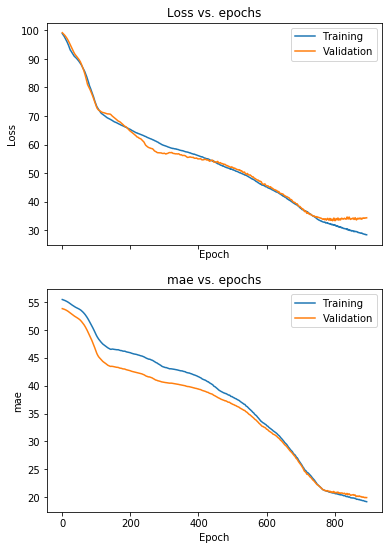

In [48]:
# plot the metrics
print("final metrics:", model_3.evaluate(X_test, Y_test, verbose=False))
plot_metrics(history.history, 'mae')

In [49]:
# dataframe to observe the results

results = pd.DataFrame({'departamento': test_df.loc[:, "departamento"],
                        'observed': Y_test,
                        'predicted': model_3.predict(X_test).reshape(25)})

results["abs_error"] = (results["observed"] - results["predicted"]).abs()

results.sort_values("abs_error", ascending=False)

,departamento,observed,predicted,abs_error
50,madre de dios,96.0,13.833512,82.166488
44,lima,323.0,250.519409,72.480591
47,loreto,84.0,19.458258,64.541742
20,callao,69.0,27.296986,41.703014
68,tacna,83.0,47.686989,35.313011
35,junin,64.0,37.038853,26.961147
11,arequipa,83.0,56.305851,26.694149
59,piura,64.0,37.818703,26.181297
65,san martin,47.0,21.404781,25.595219
71,tumbes,33.0,9.258638,23.741362
